In [2]:
! pip install mglearn
import os
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
import mglearn
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
from string import punctuation
from gensim.sklearn_api import W2VTransformer

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

    100% |████████████████████████████████| 542kB 14.3MB/s ta 0:00:01
  Stored in directory: /tmp/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


**Part 1 Import Dataset and Create Clean Dataset **
In the first module, you will learn how to import dataset and perform some basic clean steps


In [3]:
data = pd.read_csv("../input/SPAM text message 20170820 - Data.csv")

In [4]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

In [5]:
def digit_punctuation(s):
    return ''.join([i for i in s if not i.isdigit()])

In [6]:
def cleanupDoc(s):
 stopset = set(stopwords.words('english'))
 tokens = nltk.word_tokenize(s)
 cleanup = [token.lower() for token in tokens if token.lower() not in stopset and  len(token)>2]
 return cleanup

In [7]:
texts1 = []
labels = []
for i, label in enumerate(data['Category']):
    strip_no_punt=strip_punctuation(data['Message'][i].lower())
    sttrip_nodigit=digit_punctuation(strip_no_punt)
    texts1.append(cleanupDoc(sttrip_nodigit))
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

**Part 2 Create Word Cloud **
In the second module, you will learn how to create word cloud


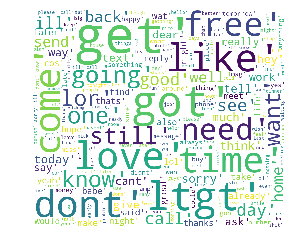

In [8]:
wordcloud = WordCloud(background_color='white',max_words=200,max_font_size=200,width=1000, height=860, random_state=42).generate(str(texts1))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)

**Part 3 Create M.L. pipeline**
In the third module, you will learn how to build text classification pipeline

In [9]:
texts2 = []
labels = []
for i, label in enumerate(data['Category']):
    strip_no_punt=strip_punctuation(data['Message'][i].lower())
    sttrip_nodigit=digit_punctuation(strip_no_punt)
    texts2.append(sttrip_nodigit)
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

In [10]:
texts2 = np.asarray(texts2)
labels = np.asarray(labels)
X_train, X_test, y_train, y_test = train_test_split(texts2 , labels, test_size=0.2, random_state=42)

In [11]:
vect = CountVectorizer().fit(np.asarray(X_train))
X_train_cv_without_stop_word = vect.transform(np.asarray(X_train))
X_test_cv_without_stop_word = vect.transform(np.asarray(X_test))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


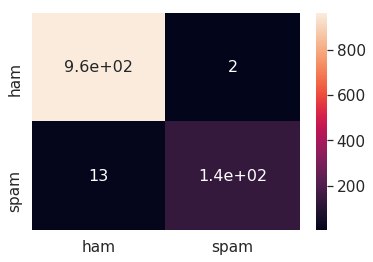

In [12]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train_cv_without_stop_word, y_train)
pred_logreg = logreg_train.predict(X_test_cv_without_stop_word )
confusion = confusion_matrix(y_test, pred_logreg)
df_cm = pd.DataFrame(confusion, ['ham','spam'],['ham','spam'])
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [13]:
max_value = X_train_cv_without_stop_word.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vect.get_feature_names())

print("features with lowest cv_with_stop_word")
print(feature_names[sorted_by_tfidf[:20]], '\n')

print("features with highest cv_with_stop_word")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest cv_with_stop_word
['aah' 'pple' 'ppl' 'ppermesssubscription'
 'poyyarikaturkolathupalayamunjalur' 'pours' 'poured' 'pounds' 'pound'
 'pouch' 'potter' 'potential' 'ppm' 'potato' 'postponed' 'posting'
 'posterode' 'posted' 'postcode' 'postcard'] 

features with highest cv_with_stop_word
['cant' 'hi' 'should' 'simple' 'is' 'ur' 'missing' 'for' 'if' 'can' 'to'
 'will' 'do' 'face' 'it' 'the' 'be' 'my' 'you' 'ltgt']


**Part 4 Using mglearn to create visualization to realize the pattern of word**
In the third module, you will learn how to mglearn to create visualization

Text(0.5,1,'TfidfVectorizer_without_stop_word-cofficient')

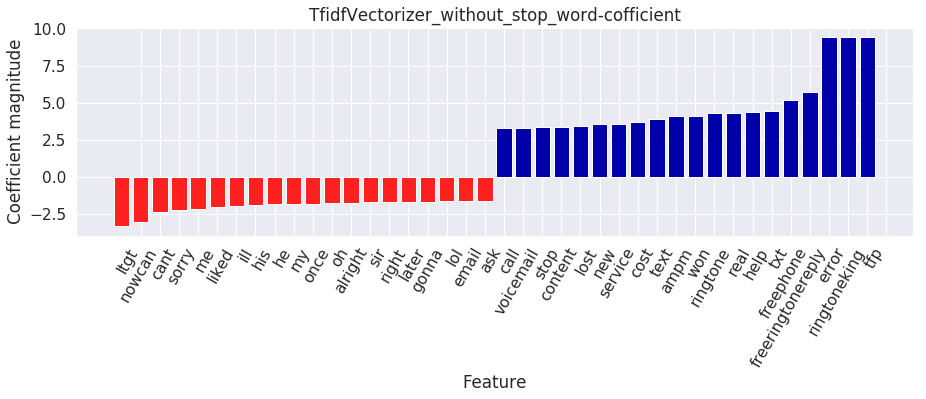

In [14]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=20)
plt.title("TfidfVectorizer_with_stop_word-cofficient")